# Feature scaling

## Simple Scaling

$$X_i = \frac{X_i}{X_{max}}$$

Giá trị trong khoảng [0,1]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arr = np.linspace(1_000_000, 100_000_000, 100)
arr / arr.max() # đưa giá trị về 0 tới 1

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

## Standardization, Z-score scaling

Giá trị trong khoảng [ - căn 3, căn 3 ]
- Standardization feature formula, mean = 0, std = 1
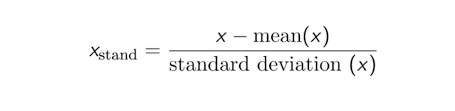
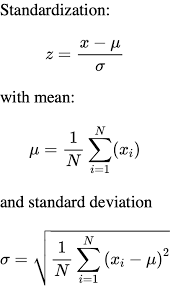

In [3]:
arr_before = np.random.normal(10, 5, size = (10000))
arr_before

array([11.91076334, 11.45159236, 15.11160234, ...,  8.16241489,
        9.91105544, 14.50483436])

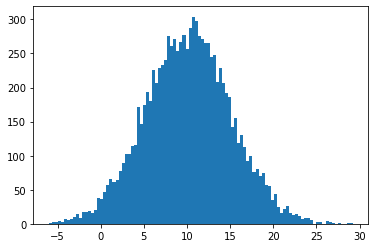

In [4]:
plt.hist(arr_before, bins = 100) # 6 sigma chiếm 97% dữ liệu
plt.show()

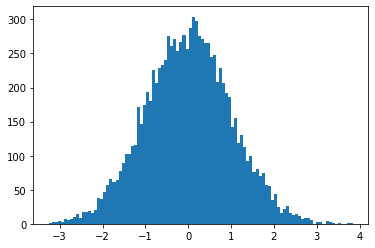

In [5]:
arr_after = (arr_before - arr_before.mean())/arr_before.std()
plt.hist(arr_after, bins = 100) # 6 sigma chiếm 97% dữ liệu
plt.show()

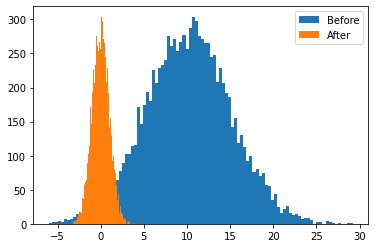

In [6]:
plt.hist(arr_before, bins = 100, label='Before')
plt.hist(arr_after, bins = 100, label='After')
plt.legend()
plt.show()

## Normalisation

Giá trị chuẩn hoá về [0,1]
![](https://cdn.educba.com/academy/wp-content/uploads/2019/05/Normalization-Formula.jpg)

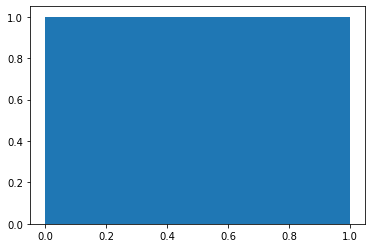

In [7]:
arr_norm = (arr - np.min(arr))/(np.max(arr) - np.min(arr))
plt.hist(arr_norm, bins = 100)
plt.show()

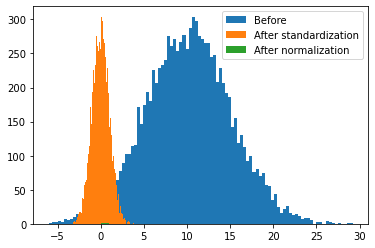

In [8]:
plt.hist(arr_before, bins = 100, label='Before')
plt.hist(arr_after, bins = 100, label='After standardization')
plt.hist(arr_norm, bins = 100, label='After normalization')
plt.legend()
plt.show()

# Overfiting vs Underfiting

![](https://image.ibb.co/bDA9TR/overfitting2.png)

__High bias = Underfit__ : Mô hình học quá đơn giản để hiểu rõ tập dữ liệu dẫn đến kết quả tệ. (không capture được xu hướng)

__High variance = Overfit__ : Mô hình quá phức tạp để hiểu rõ tập dữ liệu do học quá sâu vào các chi tiết nhỏ nhặt. (chú ý tiểu tiết quên đi tổng thể, xu thế tổng quan). Giống học tủ, học vẹt, tốt trên tập training, tệ trên tập test.

Trong thực tế overfit là trường hợp ta gặp phải rất nhiều.

Nguyên lý larange: `Với n điểm dữ liệu, chúng ta luôn có 1 phương trình đi qua n điểm nhưng nó là bậc n-1.`

![](https://media.geeksforgeeks.org/wp-content/cdn-uploads/20190523171258/overfitting_2.png)

![](https://www.researchgate.net/profile/Benyamin-Ghojogh/publication/333505702/figure/fig5/AS:764463133249538@1559273622858/The-overfitting-of-model-a-training-error-and-true-error-b-depiction-of-Eq-33.ppm)

$$Error = Variance + Bias^2 + Irreducible\_error$$

Irreducible error: những sai số không thể giảm được do dữ liệu luôn có noises, outliers.
Bias, Variance: những sai số có thể giảm được và ta thường chọn 1 ngưỡng để cân bằng bias-variance -> bias-variance tradeoff.

![](https://www.endtoend.ai/assets/blog/misc/bias-variance-tradeoff-in-reinforcement-learning/front.png)

# Regularization

- Mục đích: Giảm overfit bằng cách giảm theta.

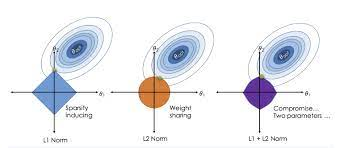

## 1. Elastic Net

![](https://media.geeksforgeeks.org/wp-content/uploads/20200723010928/Elastic_1.png)

## 2. L1 regularization (Lasso)

## 3. L2 regularization (Ridge)

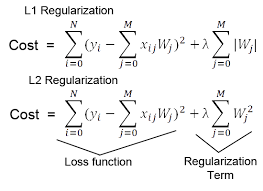

L1 (Lasso) regularization sử dụng absolute bậc 1 nên khi tăng penalty thì Wj về 0 nhanh hơn, dẫn đến Wj sẽ là 1 ma trận thưa -> feature selection

L2 (Ridge) bậc 2 nên Wj sẽ tiếp cận về 0 chậm hơn nên giảm các bộ trọng số đồng thời xuống, khuếch đại error -> Giảm đồng thời tác động của tất cả các features.

Elastic Net là sự kết hợp của L1 và L2)